# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

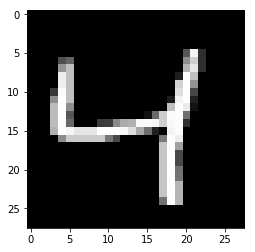

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,[None,784])
targets_ = tf.placeholder(tf.float32,[None,784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,784,activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6936
Epoch: 1/20... Training loss: 0.6908
Epoch: 1/20... Training loss: 0.6884
Epoch: 1/20... Training loss: 0.6851
Epoch: 1/20... Training loss: 0.6813
Epoch: 1/20... Training loss: 0.6773
Epoch: 1/20... Training loss: 0.6684
Epoch: 1/20... Training loss: 0.6649
Epoch: 1/20... Training loss: 0.6564
Epoch: 1/20... Training loss: 0.6449
Epoch: 1/20... Training loss: 0.6320
Epoch: 1/20... Training loss: 0.6211
Epoch: 1/20... Training loss: 0.6058
Epoch: 1/20... Training loss: 0.5931
Epoch: 1/20... Training loss: 0.5757
Epoch: 1/20... Training loss: 0.5603
Epoch: 1/20... Training loss: 0.5413
Epoch: 1/20... Training loss: 0.5280
Epoch: 1/20... Training loss: 0.5065
Epoch: 1/20... Training loss: 0.4843
Epoch: 1/20... Training loss: 0.4665
Epoch: 1/20... Training loss: 0.4481
Epoch: 1/20... Training loss: 0.4343
Epoch: 1/20... Training loss: 0.4264
Epoch: 1/20... Training loss: 0.4084
Epoch: 1/20... Training loss: 0.3919
Epoch: 1/20... Training loss: 0.3806
E

Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1749
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1793
Epoch: 1/20... Training loss: 0.2215
Epoch: 1/20... Training loss: 0.2159
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1896
Epoch: 2/20... Training loss: 0.1925
Epoch: 2/20... Training loss: 0.1912
Epoch: 2/20... Training loss: 0.1958
Epoch: 2/20... Training loss: 0.1900
Epoch: 2/20... Training loss: 0.1909
Epoch: 2/20... Training loss: 0.1875
Epoch: 2/20... Training loss: 0.1930
Epoch: 2/20... Training loss: 0.1878
Epoch: 2/20... Training loss: 0.1927
Epoch: 2/20... Training loss: 0.1866
Epoch: 2/20... Training loss: 0.1939
Epoch: 2/20... Training loss: 0.1869
Epoch: 2/20... Training loss: 0.1916
Epoch: 2/20... Training loss: 0.1842
Epoch: 2/20... Training loss: 0.1880
Epoch: 2/20... Training loss: 0.1950
Epoch: 2/20... Training loss: 0.1879
E

Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1567
E

Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1350
E

Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1198
E

Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1176
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1126
E

Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1111
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1122
Epoch: 6/20... Training loss: 0.1112
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1090
E

Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1087
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1035
E

Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1031
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.1044
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1010
E

Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.1022
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.1016
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0988
E

Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0898
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.1002
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.1006
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0999
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.1006
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.1005
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0893
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0988
Epoch: 16/20... Training loss: 0.0890
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0993
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0979
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0885
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0887
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0976
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

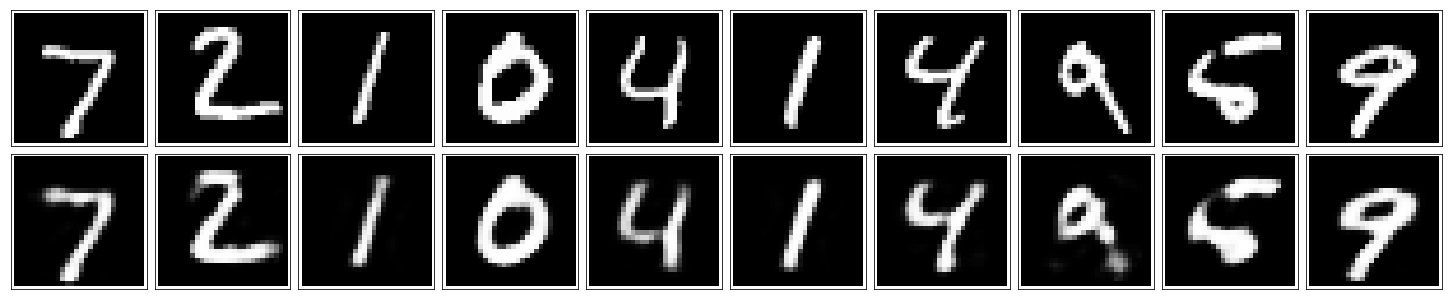

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.